# 2. Linear Regression

* 데이터에 대한 이해(Data Definition)
    * 학습할 데이터에 대해서 알아봅니다.

* 가설(Hypothesis) 수립
    * 가설을 수립하는 방법에 대해서 알아봅니다.

* 손실 계산하기(Compute loss)
    * 학습 데이터를 이용해서 연속적으로 모델을 개선시키는데 이 때 손실(loss)를 이용합니다.
    * 비용함수 = 손실함수 = 오차함수 = 목적함수
    * cost function = loss function = error function = objective function

* 경사 하강법(Gradient Descent)
    * 학습을 위한 핵심 알고리즘인 경사 하강법(Gradient Descent)에 대해서 이해합니다.
    * Opimzier
        * 비용함수를 최소화하는 W와 b를 찾는 방법 ( 이 과정이 학습)
        * 기본적인 옵티마이저 알고리즘 : 경사하강법

* 가설(선형회기) , 비용함수(평균제곱오차) , 옵티마이저(경사하강법)

### Theoretical Overview
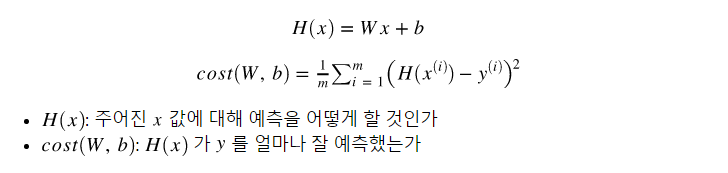

### Imports

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [59]:
# For reproducibility
torch.manual_seed(1)

### Data definition

In [60]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [61]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


### Hypothesis

* Weight 와 Bias를 0으로 초기화
* `requires_grad=True` : 자동미분 기능 적용

In [62]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1,requires_grad=True)
hypothesis = x_train*W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### Compute loss

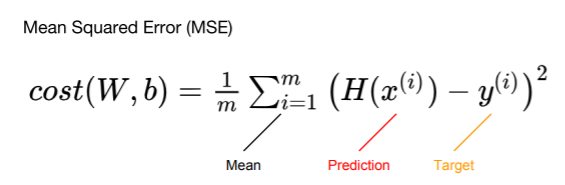

* torch.mean으로 평균 계산

In [63]:
print(hypothesis-y_train)

tensor([[-2.],
        [-4.],
        [-6.]], grad_fn=<SubBackward0>)


In [64]:
print((hypothesis-y_train)**2)

tensor([[ 4.],
        [16.],
        [36.]], grad_fn=<PowBackward0>)


In [65]:
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### Gradient descent
* torch.optim 라이브러리
    * [W, b] 는 학습할 tensor
    * lr=0.01 러닝레이트
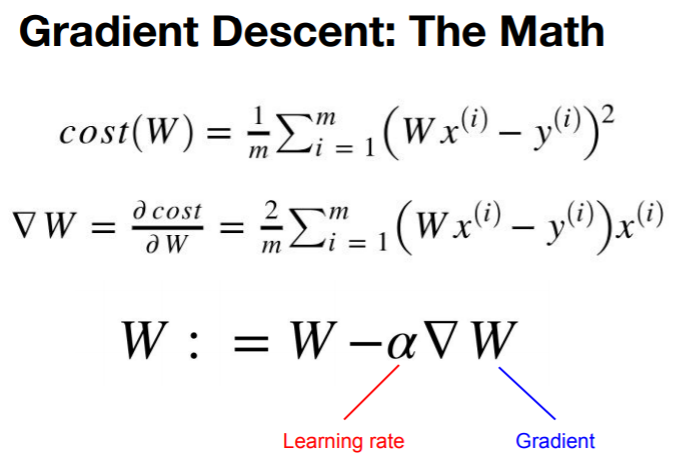

In [66]:
optimizer = optim.SGD([W, b],lr=0.01)

In [67]:
optimizer.zero_grad() # gradient 를 0으로 초기화
cost.backward() # 비용함수를 미분하여 gradient 계산 (W와 b에 대한 기울기 계산)
optimizer.step() # W와 b를 업데이트 (W와 b에서 기울기와 학습률을 곱하여 빼줌)

In [68]:
print(W)
print(b)

tensor([0.1867], requires_grad=True)
tensor([0.0800], requires_grad=True)


In [69]:
# Check if the hypothesis is now better
hypothesis = x_train*W + b
print(hypothesis)

tensor([[0.2667],
        [0.4533],
        [0.6400]], grad_fn=<AddBackward0>)


In [70]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(14.7710, grad_fn=<MeanBackward0>)


### Training with Full Code

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# For reproducibility
torch.manual_seed(1)

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = x_train*W + b
    
    cost = torch.mean((hypothesis-y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1000 W: 1.971, b: 0.066 Cost: 0.000633


## High-level Implementation with `nn.Module`

In [32]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [33]:
# Pytorch의 모든 모델은 제공되는 nn.Module을 inherit해서 만들게 된다.
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        return self.linear(x)

* 모델의 `__init__`에서 사용할 레이어 정의
    * linear regression모델을 만들기 때문에 nn.Linear이용
* forward에서는 이 모델이 어떻게 입력값에서 출력값을 계산하는지 알려줌

In [36]:
model = LinearRegressionModel()

hypothesis = model(x_train)
print(hypothesis)

tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward>)


In [39]:
cost = F.mse_loss(hypothesis, y_train)
print(cost)

tensor(4.6303, grad_fn=<MseLossBackward>)


In [40]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

### Training with Full Code

In [41]:

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: -0.784, b: 0.665 Cost: 13.291902
Epoch  100/1000 W: 0.580, b: 0.955 Cost: 0.131521
Epoch  200/1000 W: 0.670, b: 0.751 Cost: 0.081272
Epoch  300/1000 W: 0.740, b: 0.590 Cost: 0.050221
Epoch  400/1000 W: 0.796, b: 0.464 Cost: 0.031034
Epoch  500/1000 W: 0.840, b: 0.365 Cost: 0.019177
Epoch  600/1000 W: 0.874, b: 0.287 Cost: 0.011850
Epoch  700/1000 W: 0.901, b: 0.225 Cost: 0.007323
Epoch  800/1000 W: 0.922, b: 0.177 Cost: 0.004525
Epoch  900/1000 W: 0.939, b: 0.139 Cost: 0.002796
Epoch 1000/1000 W: 0.952, b: 0.109 Cost: 0.001728


### Autograd 실습

In [83]:
import torch

In [84]:
W = torch.tensor(2.0, requires_grad=True)

In [85]:
y = W**2
z = 2*y + 5

In [86]:
# w에 대해 미분
z.backward()
print(W.grad) # 결과

tensor(8.)
